I worked with Magnus Andreas Giverin on this assignment

# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation
from logistic_regression import LogisticRegression

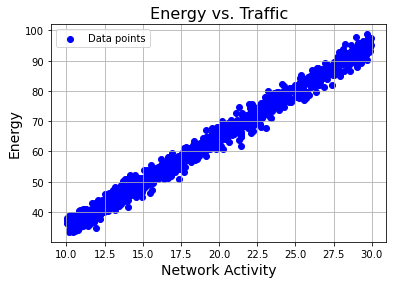

In [4]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

model = lr.predict(data['Net_Activity'])

A good estimate for the equation would be: y = 3.0063 * x + 4.9408


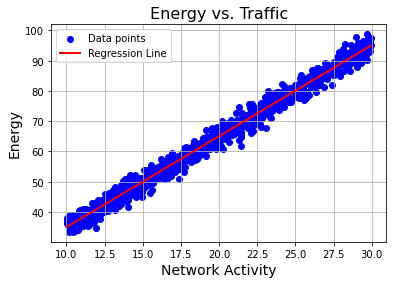

In [6]:
X = data['Net_Activity'].values

x_range = np.linspace(X.min(), X.max(),1000)
y_pred = lr.predict(x_range)

# print('Weight: ',lr.weights[0], 'Bias: ',lr.bias)
# print('Et godt uttrykk for Energy Consumption er: ',round(lr.weights[0],4),'* x +',round(lr.bias,4))

Y_min = data['Energy'].min()
Y_max = data['Energy'].max()

lr.printExpressions(y_pred[0],y_pred[-1])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(x_range, y_pred, c='red', label='Regression Line', linewidth=2)
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


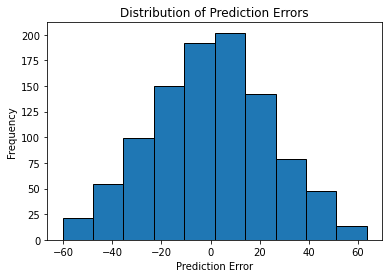

The average error is:  0.1462672001907769


In [7]:
error = data['Energy'] - y_pred

plt.hist(error, bins=10, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

print('The average error is: ',np.mean(error))


Question 2b:
As we can see in the above graph, the error seems to be on the smaller side. Considering that we are seeing a approximate bell-curve (normalfordeling), we can assume that our linear-regression model is performing well since this is expected. There are however some outliers in the plus/minus 60 areas, so there are room for improvement.

An unbiased estimator would be an estimator which has a expected estimation-error set as zero. This means that, in the long run, if one uses the estimator to make many estimates, the average of these estimated values will approach the true value of the parameter being estimated.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [9]:
#Model training
X = train[['x0', 'x1']]
y = train['y']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(learning_rate=0.1, epochs=10000,degree=10,threshold=0.5)  
model.fit(X_scaled, y)


In [10]:
#Predictions
X_test = test[['x0', 'x1']]
X_test_scaled = scaler.transform(X_test) 

y_pred = model.predict(X_test_scaled)

In [11]:
#Find accuracy
accuracy = np.mean(y_pred == test['y'].values)
print(accuracy)

0.882


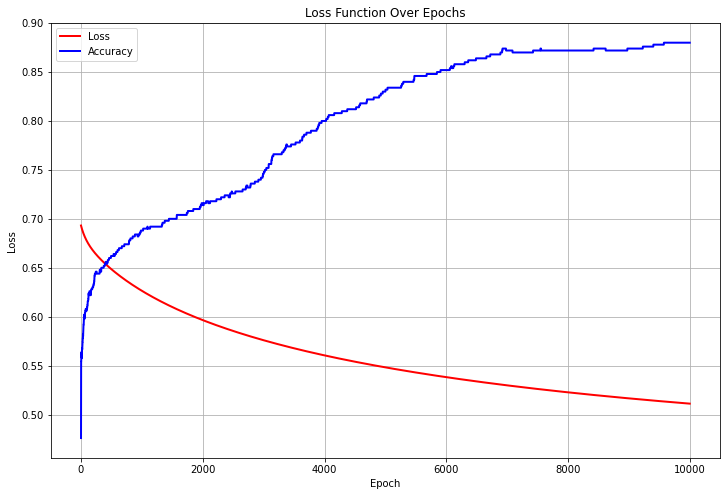

In [12]:
#Plot loss vs accuracy over epochs
plt.figure(figsize=(12, 8))
plt.plot(model.losses, c='red', label='Loss', linewidth=2)
plt.plot(model.accuracies, c='blue', label='Accuracy', linewidth=2)
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


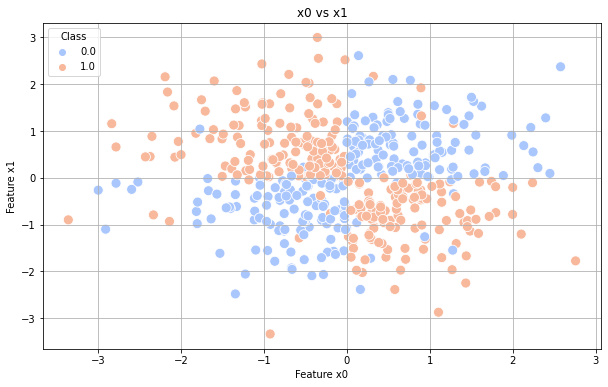

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='x0', y='x1', hue='y', palette='coolwarm', edgecolor='w', s=100)
plt.title('x0 vs x1')
plt.xlabel('Feature x0')
plt.ylabel('Feature x1')
plt.legend(title='Class')
plt.grid(True)
plt.show()


a) The initial poor performance was about 0.434 accuracy, I thought this occured as a consequence of the data beeing divided into 'two parts' as shown in the above graph. This means that a logreg model will try to make a line adjust into this without really being able to fit the whole dataset. The solution seems to be to take advantage of the sklearn.polynomialfeatures library, and make the data into polynomials. This made a much better result, 0.92 with 1M epochs and a learning rate of 0.01, which is adequate for this model.

b) Induction Bias means that each model has a implicit assumption that the data you feed it is on a 'correct' form, meaning that if a linear model is fed non-linear data it wont be able to compute very efficiently. This tasks model is a logistic regression, meaning it expecrs linear data which is then transformed via the sigmoid function. As explained in the last task, the data here is not linear AT ALL. This makes it extremely hard for the model to predict anything useful at all, which is why the model performed worse than a random guess.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth=10000, random_state=1000)
tree_model.fit(X, y)

y_pred_tree = tree_model.predict(X_test)

accuracy = accuracy_score(test['y'].values, y_pred_tree)
print(f"Accuracy: {accuracy}")


Accuracy: 0.874


c) In the above code I solved the task with DecisionTreeClassifier as instructed. I did find the code itself quite alot easier, however there seems to be a accuracy drop the further we let the tree 'grow'. With the depth set to 10K I got an accuracy of 0.87, which is less than the logreg code and the required performance for the task. It did however perform good with a 3 node tree. I think the decision tree performs good here is because of the way the data is given. The tree doesn't care if there is a linear relationship in the data, it just splits in into subsets and looks at the interactions this again produces.
   
d) Plot of ROC curve is beneath.

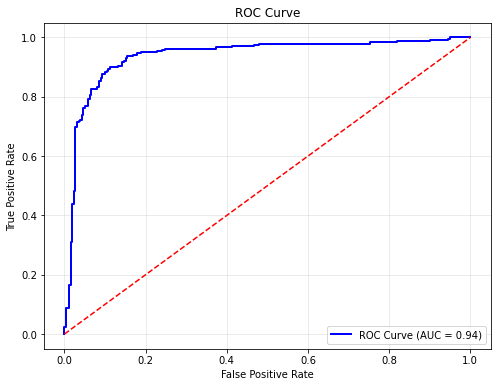

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model.roc_predict(X_test_scaled)

fpr, tpr, thresholds = roc_curve(test['y'].values, y_pred)

auc = roc_auc_score(test['y'].values, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [16]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [17]:
# sns.pairplot(train, hue='target',vars=['data_stream_'+str(i) for i in range(11)],diag_kind='kde')
# plt.show()

In [18]:
numeric_columns = train.select_dtypes(include=[np.number]).columns

z_scores = np.abs((train[numeric_columns] - train[numeric_columns].mean()) / train[numeric_columns].std())
threshold = 3

anomalies_per_column = (z_scores > threshold).sum()

most_anomalous_column = anomalies_per_column.idxmax()
most_anomalous_count = anomalies_per_column.max()

print(f"The column with the most anomalies is: {most_anomalous_column}")
print(f"Number of anomalies in this column: {most_anomalous_count}")

#FOR TESTING PURPOSES
most_anomalous_column = 'data_stream_3'

#print(train[most_anomalous_column])

The column with the most anomalies is: data_stream_7
Number of anomalies in this column: 66


In [19]:
from sklearn.preprocessing import PolynomialFeatures

#Decrypt the data functions

"TRAINING"
train[most_anomalous_column] = (train[most_anomalous_column] * 1000) % 2 #Decrypt possibly bad data

x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]


if y_train.dtype == 'float' or y_train.dtype == 'int':
    y_train = pd.cut(y_train, bins=2, labels=[0, 1])

"TESTING"
test[most_anomalous_column] = (test[most_anomalous_column] * 1000) % 2  # Decrypt for testing as well

x_test = test.iloc[:, :-1]  
y_test = test.iloc[:, -1]   


In [20]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=6,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)


model_3.fit(x_train, y_train)
#print(x_train.head(10))


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       random_state=42)

In [21]:
y_pred = model_3.predict(x_test)
y_pred_probability = model_3.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

roc_auc = roc_auc_score(y_test, y_pred_probability)
print(f"ROC AUC Score: {round(roc_auc,2)}")

Accuracy: 0.6075
ROC AUC Score: 0.72


a)

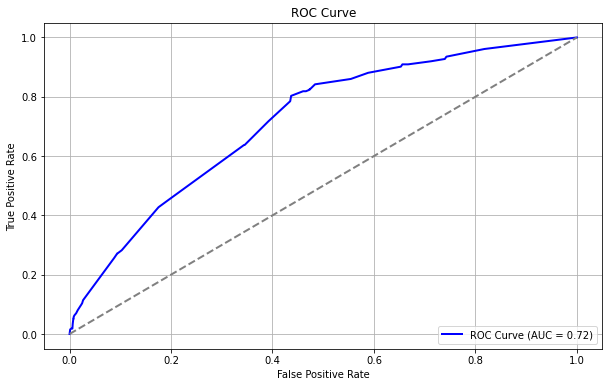

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {round(roc_auc,2)})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


a) Breaking the threshold involved several strategies, at first I didn't know how I could plot the data in a useful manner so I only worked with accuracy and roc auc for some time. After finally finding a way to plot with Seaborn I saw that 'data_stream_3' seemed a bit peculiar compared to the others, and decided that this must be the data with encryption. I decrypted using the tips given on BlackBoard and got a ROC AUC rounded to 0.72. I did not change a lot on the hyperparameters, from the beginning it was quite obvious the model would only be worse after adjusting the depth more than 7. I did find that Entropy worked a bit better than Gini, and thus went with that instead.

b) While accuracy is generally good as a easy to read metric, with it easily displaying a 'x percent accuracy' and we interpret that bad or good. ROC AUC however, measures how well the model handles precision and recall, which in the bigger picture is far more important when evaluating the model. Based on the ROC curve above, we can see that it performs okay at best, just at the minimum demand for the task. It seems to have a similarity to most of the ROC curves where there is a small 'peak' at the middle of the graph, right before the TPR starts increasing again.

c) Code beneath demonstrates how RandomForestClassifier could solve the problem on the same dataset. Random Forest gives a 1.5% increase in ROC AUC and about the same accuracy. These are however on the same hyperparameters as DecisionTreeClassifier, adjusting them a bit here grants a bit better accuracy and a tad bit better ROC AUC.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=7,       
    min_samples_split=4,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
y_pred_probability = rf_model.predict_proba(x_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Random Forest: {accuracy}")

roc_auc = roc_auc_score(y_test, y_pred_probability)
print(f"ROC AUC Score with Random Forest: {roc_auc}")


Accuracy with Random Forest: 0.622
ROC AUC Score with Random Forest: 0.7269198913650635



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [24]:
import pandas as pd
import numpy as np

train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

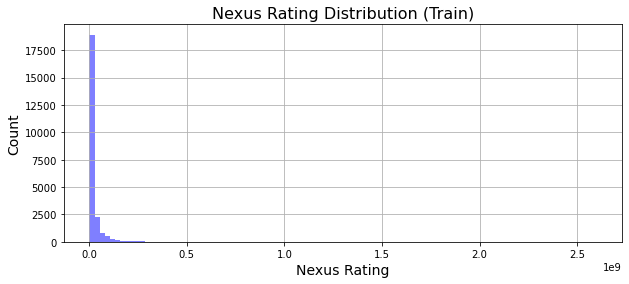

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [26]:
X_train = train.drop(columns=['nexus_rating'])
y_train = train['nexus_rating']

# For the test data, since the target 'nexus_rating' isn't typically available in test sets:
X_test = test.drop(columns=['nexus_rating'], errors='ignore')
y_test = test['nexus_rating']

if 'nexus_rating' in test.columns:
    X_test = test.drop(columns=['nexus_rating'])
    y_test = test['nexus_rating']
else:
    X_test = test  # Just the features, no target available
    y_test = None


In [27]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
test_imputed = pd.DataFrame(imputer.transform(test), columns=test.columns)

train_stats = train_imputed.apply(np.median, axis=0)
test_stats = test_imputed.apply(np.median, axis=0)

# Create a DataFrame to hold column similarities
similarities = pd.DataFrame(index=test_imputed.columns, columns=train_imputed.columns)

# Calculate absolute differences in median values to assess similarity
for test_col in test_imputed.columns:
    for train_col in train_imputed.columns:
        similarities.loc[test_col, train_col] = abs(train_stats[train_col] - test_stats[test_col])

# Initialize mappings
column_mapping = {}
used_train_cols = set()
used_test_cols = set()

# Function to find the best available training column for a given test column
def find_best_match(test_col):
    available_train_cols = [col for col in train_imputed.columns if col not in used_train_cols]
    if not available_train_cols:
        return None
    best_match = None
    best_similarity = np.inf
    for train_col in available_train_cols:
        similarity = similarities.loc[test_col, train_col]
        if similarity < best_similarity:
            best_similarity = similarity
            best_match = train_col
    return best_match

# Iterate over each test column to find the best match
for test_col in test_imputed.columns:
    if test_col in used_test_cols:
        continue
    best_train_col = find_best_match(test_col)
    if best_train_col is not None:
        column_mapping[test_col] = best_train_col
        used_train_cols.add(best_train_col)
        used_test_cols.add(test_col)
        print(f"Mapping test column '{test_col}' to train column '{best_train_col}'")
    else:
        print(f"Warning: No available training column found for test column '{test_col}'")

# Rename the columns in the test data
test_reordered = test.rename(columns=column_mapping)

# Ensure all training columns are present in the reordered test data
for train_col in train_imputed.columns:
    if train_col not in test_reordered.columns:
        print(f"Warning: Column '{train_col}' is missing from the reordered test data.")
        test_reordered[train_col] = np.nan

# Reorder the columns to match the training data
test_reordered = test_reordered[train_imputed.columns]

def swap_headers(df, col1, col2):
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Both column names must be present in the DataFrame.")
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_swapped = df.copy()
    
    # Swap the columns
    df_swapped.columns = [col2 if col == col1 else col1 if col == col2 else col for col in df.columns]
    
    print(f"    Swapped columns '{col1}' and '{col2}'")
    return df_swapped

print("Manual swaps:")
test_reordered = swap_headers(test_reordered, 'external_collectors', 'ambient_harvesters')
test_reordered = swap_headers(test_reordered, 'upper_collector_height', 'energy_flow_design')
test_reordered = swap_headers(test_reordered, 'shielded_harvesters', 'external_collectors')

# Save the reordered test data to a new CSV file for later use
test_reordered.to_csv('final_mission_test_reordered.csv', index=False)

print("Data manipulation complete. Reordered test data saved to 'final_mission_test_reordered.csv'.")

Mapping test column 'ownership_type' to train column 'ownership_type'
Mapping test column 'nexus_rating' to train column 'energy_footprint'
Mapping test column 'energy_footprint' to train column 'core_reactor_size'
Mapping test column 'core_reactor_size' to train column 'harvesting_space'
Mapping test column 'harvesting_space' to train column 'vertical_alignment'
Mapping test column 'vertical_alignment' to train column 'power_chambers'
Mapping test column 'power_chambers' to train column 'upper_collector_height'
Mapping test column 'energy_flow_design' to train column 'energy_flow_design'
Mapping test column 'upper_collector_height' to train column 'shared_conversion_units'
Mapping test column 'shared_conversion_units' to train column 'isolated_conversion_units'
Mapping test column 'isolated_conversion_units' to train column 'internal_collectors'
Mapping test column 'internal_collectors' to train column 'shielded_harvesters'
Mapping test column 'external_collectors' to train column 'ex

In [29]:
import seaborn as sns

# Plot density plots for each column in train and test datasets
def plot_density_plots(train_df, test_df, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        sns.kdeplot(train_df[col].dropna(), label='Train', color='blue', fill=True)
        sns.kdeplot(test_df[col].dropna(), label='Test', color='orange', fill=True)
        plt.title(f'Density Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# List of columns to compare (excluding 'nexus_rating' if it's the target)
columns_to_compare = [col for col in train.columns if col in test.columns]

# Plot histograms for the specified columns
#plot_density_plots(train, test_reordered, columns_to_compare)


In [30]:
#All this is for imputing and scaling the data before training

imputer = SimpleImputer(strategy='mean')

test_aligned = test_reordered.reindex(columns=train.columns, fill_value=np.nan) #Test re-ordered is done by the previous codeblock

train_imputed = imputer.fit_transform(train)
test_imputed = imputer.transform(test_aligned)

train_imputed_df = pd.DataFrame(train_imputed, columns=train.columns)
test_imputed_df = pd.DataFrame(test_imputed, columns=test_aligned.columns)

X_train_imputed = train_imputed_df.drop(columns=['nexus_rating'])
y_train_imputed = train_imputed_df['nexus_rating']

X_test_imputed = test_imputed_df.drop(columns=['nexus_rating'])
y_test_imputed = test_imputed_df['nexus_rating']

scaler_X = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train_imputed)
X_test = scaler_X.transform(X_test_imputed)

y_train = np.log1p(y_train_imputed)
y_test = y_test_imputed

In [34]:

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

gbr = GradientBoostingRegressor(
    n_estimators=2500,         
    learning_rate=0.01,         
    max_depth=8,                
    min_samples_split=2,      
    min_samples_leaf=1,        
    max_features='sqrt',        
    subsample=0.8,              
    random_state=42           
) 

rfr = RandomForestRegressor(
    n_estimators=1200,
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

catboost_model = CatBoostRegressor(
    iterations=10000,
    learning_rate=0.01,
    depth=10,
    l2_leaf_reg=5,
    random_strength=1,
    loss_function='RMSE',
    verbose=0,
    random_seed=42
)



estimators = [
    ('gbr', gbr),
    ('catboost', catboost_model)
]

stacking_regressor = StackingRegressor(
    estimators=estimators, 
    final_estimator=Ridge(alpha=1),
    cv=5,
    verbose=0,
    n_jobs=-1
)

print("Fitting models...")

print("RFR ONGOING")
rfr.fit(X_train, y_train)
y_pred_rfr = np.expm1(rfr.predict(X_test))
rmsle_rfr = rmsle(y_test, y_pred_rfr)
print(f'RMSLE Random Forest Model: {rmsle_rfr}')
print("     1 - Finished fitting rfr.")

print("GBR ONGOING")
gbr.fit(X_train, y_train)
y_pred_gbr = np.expm1(gbr.predict(X_test))
rmsle_gbr = rmsle(y_test, y_pred_gbr)
print(f'RMSLE Gradient Boost Model: {rmsle_gbr}')
print("     2 - Finished fitting gbr.")

print("CATBOOST ONGOING")
catboost_model.fit(X_train, y_train)
y_pred_catboost = np.expm1(catboost_model.predict(X_test))
rmsle_catboost = rmsle(y_test, y_pred_catboost)
print(f'RMSLE CatBoost Model: {rmsle_catboost}')
print("     3 - Finished fitting catboost")

print("STACK ONGOING")
stacking_regressor.fit(X_train, y_train)
y_pred_stack = np.expm1(stacking_regressor.predict(X_test))
rmsle_stack = rmsle(y_test, y_pred_stack)
print(f'RMSLE Stacking Ensemble Model: {rmsle_stack}')
print("     4 - Finished fitting stacked.")

print(f'RMSLE Average Ensemble: {(rmsle_catboost + rmsle_gbr + rmsle_rfr) / 3}')


Fitting models...
RFR ONGOING
RMSLE Random Forest Model: 0.3014550254668244
     1 - Finished fitting rfr.
GBR ONGOING
RMSLE Gradient Boost Model: 0.29406642689593754
     2 - Finished fitting gbr.
CATBOOST ONGOING
RMSLE CatBoost Model: 0.2970991906367396
     3 - Finished fitting catboost
STACK ONGOING
RMSLE Stacking Ensemble Model: 0.2940739577102936
     4 - Finished fitting stacked.
RMSLE Average Ensemble: 0.2975402143331672


a) To achieve the RMSLE, I focused on data preprocessing, handling missing values with a imputer, and transforming the target variable using a logarithmic transformation. But to actually come close to the threshold I have been testing (and failing) with a lot of different models and hyperparameters until I got the result above. It is also worth mentioning a big part of why the models actually manage to predict something useful is because of the sorting algorithm done in the preprocessing phase.

b) RMSLE is good when the target variable spans several orders of magnitude and we care about the relative error between the predicted and actual values. I use a 'sort of' RMSLE loss function, becuase the models themselves have a RMSE loss function, but the y_train values they are trained on are actually logarithmically transformed before training. In essense this makes the loss function somewhat equal to the RMSLE version.

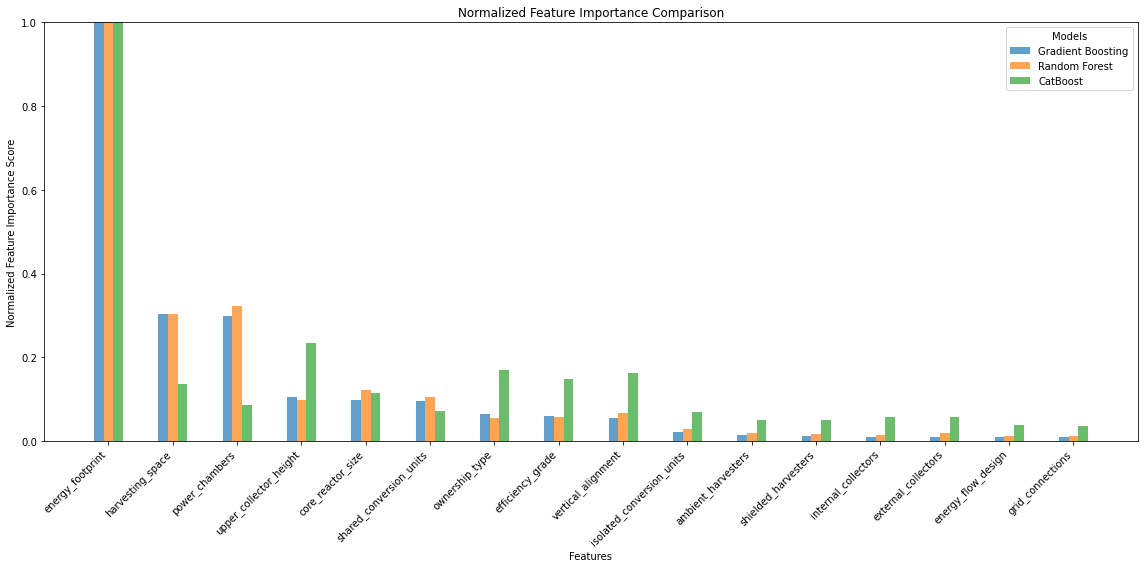

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def get_feature_importance(model):
    if hasattr(model, 'feature_importances_'):
        return model.feature_importances_
    elif hasattr(model, 'get_feature_importance'):
        return model.get_feature_importance()
    else:
        return None
    
gbr_importance = get_feature_importance(gbr)
rfr_importance = get_feature_importance(rfr)
cbr_importance = get_feature_importance(catboost_model)
feature_names = train.columns.tolist()  
feature_names.remove('nexus_rating')  

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Gradient Boosting': gbr_importance,
    'Random Forest': rfr_importance,
    'CatBoost': cbr_importance
})

importance_df.set_index('Feature', inplace=True)
importance_df_normalized = importance_df.div(importance_df.max(axis=0), axis=1)

importance_df_normalized = importance_df_normalized.sort_values(by='Gradient Boosting', ascending=False)
features = importance_df_normalized.index  
models = importance_df_normalized.columns  
bar_width = 0.15

# Generate x locations for each feature
x = np.arange(len(features))
plt.figure(figsize=(16, 8)) 

# Create a bar plot for each model
for i, model in enumerate(models):
    plt.bar(x + i * bar_width, importance_df_normalized[model], width=bar_width, alpha=0.7, label=model)
plt.title('Normalized Feature Importance Comparison')
plt.ylabel('Normalized Feature Importance Score')
plt.xlabel('Features')
plt.ylim(0, 1)  
plt.xticks(x + bar_width * (len(models) - 1) / 2, features, rotation=45, ha='right')  
plt.legend(title='Models')
plt.tight_layout()  
plt.show()


c) As the graph clearly shows, all the models heavily value the energy_footprint over everything else. This means that all the three models shown here (listed in Legend) are all valuing energy_footprint as the most relevant datapoint for determining the approximate nexus_rating. If I am to bring in the lore of the assigment/mission I would say this makes a lot of sense in the context of the nexus_rating :P

d) I have used several ensembling techniques, and have tried more before ending up with the final model in this notebook. My technique is using three different models in my ensemble: CatBoost, RandomForestRegressor and GradientBoosting. I divide them by how many models to find out the average. The technique that actually reaches around the threshold of 0.294 is the stacking_regressor with both GradientBoost and CatBoost as estimators, the others are close but not entirely there. 

e) By making sure the data is on the same form as the training data. This would make the model less likely to predict wrong since the data is similar to the training data, and thus the predictions should be more on point.

